# Zomato Data Analysis 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file=pd.read_csv('zomato data.csv')

In [2]:
file.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


# Convert the data type of column rate by removing denominator 5

In [3]:
def removedenominator(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

In [4]:
file['rate']=file['rate'].apply(removedenominator)
file.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


# Type of Restaurant

Text(0.5, 0, 'Type of restaurant')

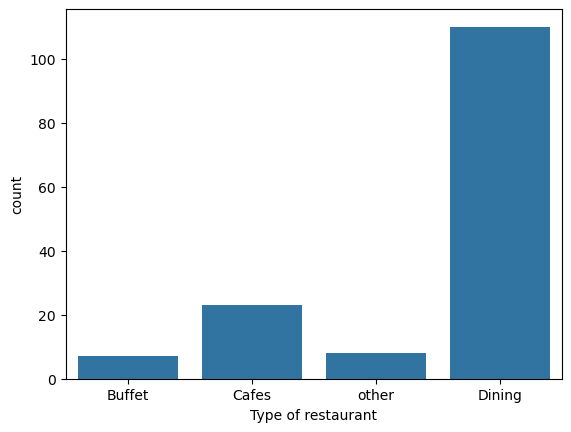

In [5]:
sns.countplot(x=file['listed_in(type)'])
plt.xlabel("Type of restaurant")

# Question 1 Majority of elements lies in which category

 ## Answer BY Plotting graph answer is clear that is Dinning

# Question 2 Votes for different types of restaurant

In [6]:
total_group=file.groupby('listed_in(type)')['votes'].sum()
total_group

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'votes')

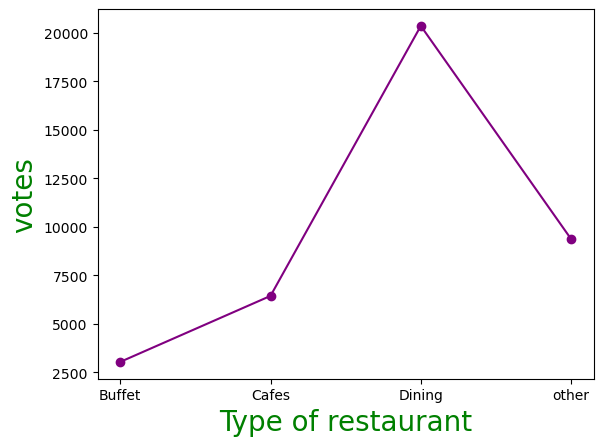

In [23]:
result=pd.DataFrame({'votes':total_group})
plt.plot(result,c="Purple",marker="o")
plt.xlabel("Type of restaurant",c="green",size=20)
plt.ylabel("votes",c="green",size=20)


## Conclusion:- Dinning restaurants have received maximum votes

#  Question:- What are the ratings most of the restaurant receive?

In [38]:
max_rate=file['rate'].value_counts().sort_index(ascending=False)
max_rate

rate
4.6     2
4.4     2
4.3     1
4.2     8
4.1    11
4.0    10
3.9    10
3.8    20
3.7    15
3.6    11
3.5     6
3.4    12
3.3    14
3.2     7
3.1     7
3.0     2
2.9     7
2.8     2
2.6     1
Name: count, dtype: int64

In [60]:
max_rate.count()

19

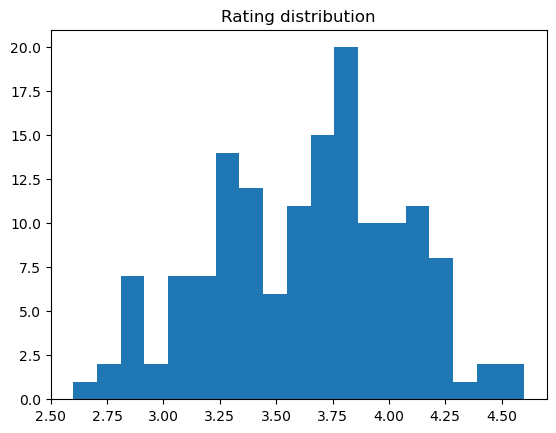

In [61]:
plt.hist(file['rate'],bins=19)
plt.title("Rating distribution")
plt.show()

# Question:- Zomato has observed that most couples order most of their food online. What is their average spending on each order??

In [63]:
file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

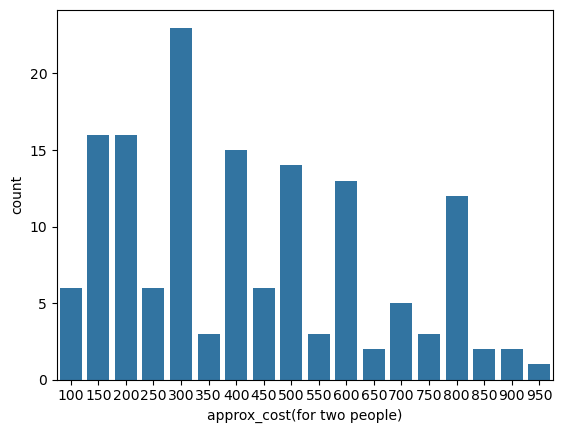

In [64]:
couple_data=file['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [70]:
average=couple_data.mean()
average

418.2432432432432

## So most of the people has order cost mostly near 300 but average cost per order is 418

# Question:- Which mode (online or offline) has receiced the maximum ratings?

In [72]:
file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

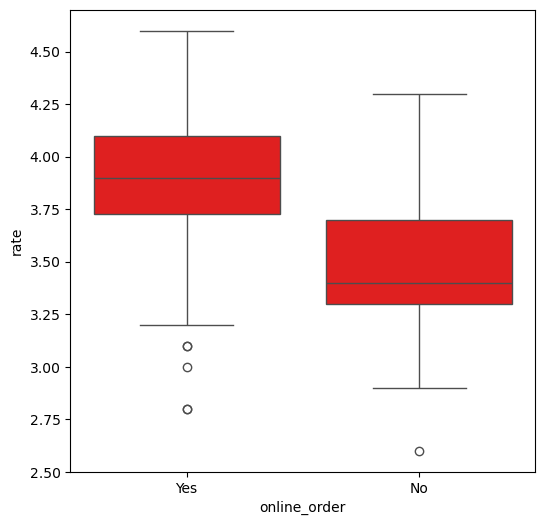

In [74]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=file,color='red')

## So people having order online give more rating as compared to offline orders

# Question:- Which type of restaurant received more offline orders, so that Zomato can attract customers with some good offers

In [76]:
file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


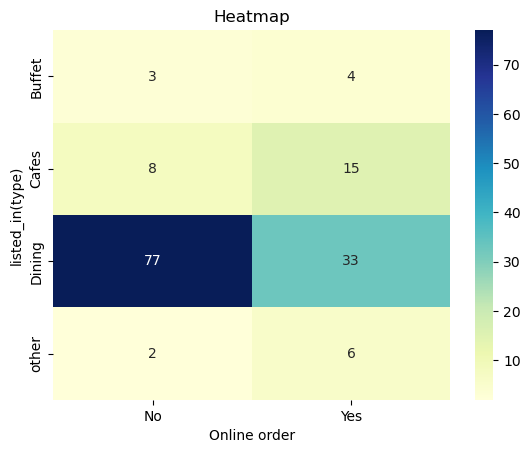

In [79]:
pivot_table = file.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel("Online order")
plt.ylabel("listed_in(type)")
plt.show()

## So Conclusion:- Dinning restaurants have majority of orders offline but cafes have majority of order online